# Importing the Necessary Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#Displaying the Image

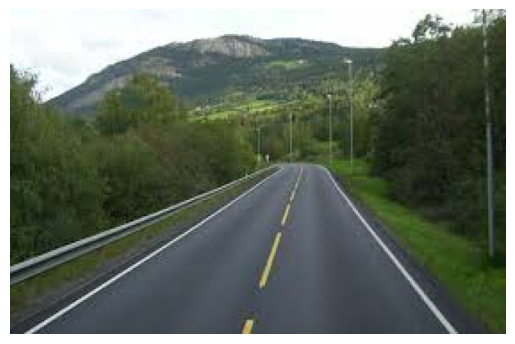

In [ ]:
image_path = '/content/road.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

#Edge Detection in Grayscale Image

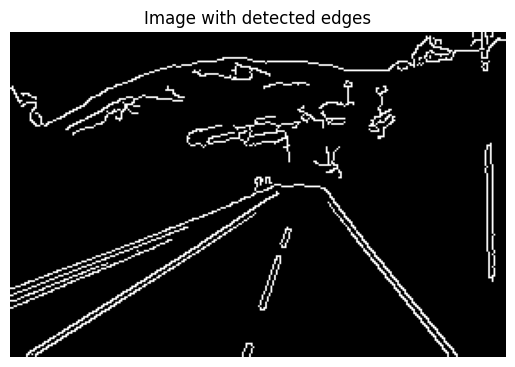

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

edges = cv2.Canny(blurred_image, 50, 150)

plt.imshow(edges, cmap='gray')
plt.title("Image with detected edges")
plt.axis('off')
plt.show()

# Region of Interest (ROI) Extraction in Edge-Detected Image

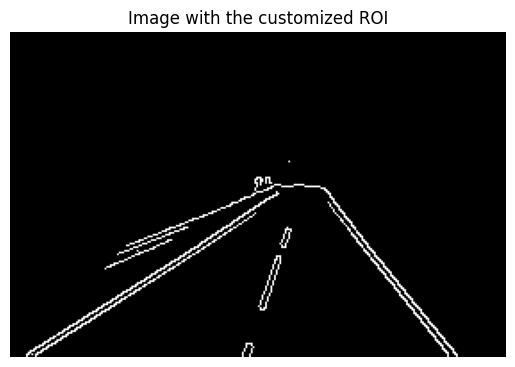

In [ ]:
height, width = edges.shape
roi_bottom_left = (0, height)
roi_bottom_right = (width, height)
roi_top_center = (width / 2, height / 2)

roi_bottom_width_percentage = 0.95
roi_top_width_percentage = 0.20
roi_height_percentage = 0.6

roi_vertices = [
    roi_bottom_left,
    (width * (1 - roi_bottom_width_percentage) / 2, height),
    (width * (1 - roi_top_width_percentage) / 2, height - height * roi_height_percentage),
    (width * (1 + roi_top_width_percentage) / 2, height - height * roi_height_percentage),
    (width * (1 + roi_bottom_width_percentage) / 2, height),
    roi_bottom_right
]

mask = np.zeros_like(edges)
cv2.fillPoly(mask, [np.array(roi_vertices, np.int32)], 255)
roi_image = cv2.bitwise_and(edges, mask)

plt.imshow(roi_image, cmap='gray')
plt.title("Image with the customized ROI")
plt.axis('off')
plt.show()

# Lane Detection Using Hough Transform in Region of Interest (ROI)

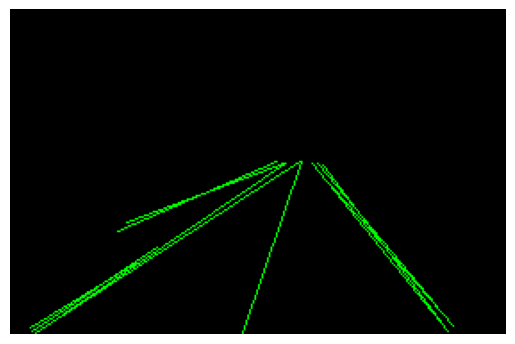

In [ ]:
lines = cv2.HoughLinesP(roi_image, 2, np.pi / 180, 50, minLineLength=20, maxLineGap=30)

line_image = np.zeros_like(image)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 1)


plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Final Image with Detected Lanes Overlay

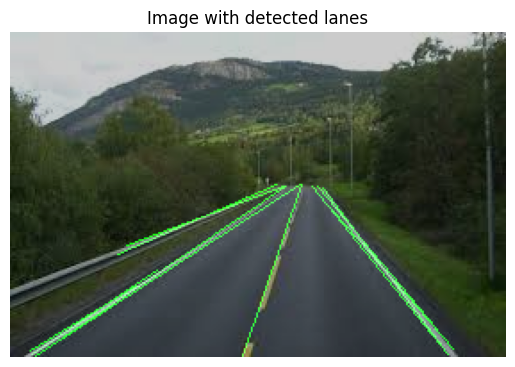

In [ ]:
final_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title("Image with detected lanes")
plt.axis('off')
plt.show()